# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
#lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
def get_params(city):
    
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    
    payloads = {
        "q": city,
        "units": "metric",
        "appid": api_keys.api_key,
    }
    
    response = requests.get(base_url, params=payloads)
    
    weather_json = response.json()
    
    city = weather_json["name"]
    cloudiness = weather_json["clouds"]["all"]
    country = weather_json["sys"]["country"]
    date = weather_json["dt"]
    humidity = weather_json["main"]["humidity"]
    lat = weather_json["coord"]["lat"]
    lng = weather_json["coord"]["lon"]
    max_temp = weather_json["main"]["temp_max"]
    wind_speed = weather_json["wind"]["speed"]
    
    params_list = [city, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed]
    return params_list 

In [4]:
df_list = []

print("Beginning Data Retrieval")
print("-----------------------------")

for i in range(len(cities)):
    city = cities[i]
    print(f"Processing Record {i} | {city}")
    try:
        params_list = get_params(city)
        df_list.append(params_list)
    except:
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | qaanaaq
Processing Record 1 | swan river
Processing Record 2 | vaini
Processing Record 3 | barrow
Processing Record 4 | provideniya
Processing Record 5 | hamilton
Processing Record 6 | vedeno
Processing Record 7 | rikitea
Processing Record 8 | avarua
Processing Record 9 | barcelona
Processing Record 10 | takoradi
Processing Record 11 | albany
Processing Record 12 | hilo
Processing Record 13 | hithadhoo
Processing Record 14 | vestmannaeyjar
Processing Record 15 | kodiak
Processing Record 16 | port blair
Processing Record 17 | jingdezhen
Processing Record 18 | punta arenas
Processing Record 19 | lompoc
Processing Record 20 | castro
Processing Record 21 | ushuaia
Processing Record 22 | trairi
Processing Record 23 | puerto ayora
Processing Record 24 | cape town
Processing Record 25 | webster groves
Processing Record 26 | nouadhibou
Processing Record 27 | mar del plata
Processing Record 28 | ponta do sol
Processing

Processing Record 230 | beaucaire
Processing Record 231 | krasnogvardeyskoye
Processing Record 232 | ust-kuyga
Processing Record 233 | belmonte
Processing Record 234 | umm jarr
City not found. Skipping...
Processing Record 235 | college
Processing Record 236 | khandagayty
Processing Record 237 | barcelos
Processing Record 238 | rudbar
City not found. Skipping...
Processing Record 239 | severo-kurilsk
Processing Record 240 | lebu
Processing Record 241 | bambous virieux
Processing Record 242 | seoul
Processing Record 243 | samoylovka
Processing Record 244 | nauta
Processing Record 245 | mildura
Processing Record 246 | souillac
Processing Record 247 | mormugao
City not found. Skipping...
Processing Record 248 | carauari
Processing Record 249 | calmar
Processing Record 250 | basco
Processing Record 251 | riacho de santana
Processing Record 252 | bargal
City not found. Skipping...
Processing Record 253 | bathsheba
Processing Record 254 | la ronge
Processing Record 255 | cayenne
Processing R

Processing Record 460 | jaguaribe
Processing Record 461 | mandalgovi
Processing Record 462 | high prairie
Processing Record 463 | ossora
Processing Record 464 | opuwo
Processing Record 465 | bubaque
Processing Record 466 | padang
Processing Record 467 | mayo
Processing Record 468 | saint-leu
Processing Record 469 | bezhetsk
Processing Record 470 | road town
Processing Record 471 | mehran
Processing Record 472 | wajima
Processing Record 473 | mount isa
Processing Record 474 | irbit
Processing Record 475 | korla
City not found. Skipping...
Processing Record 476 | hasaki
Processing Record 477 | kushmurun
City not found. Skipping...
Processing Record 478 | marsa matruh
Processing Record 479 | flinders
Processing Record 480 | praia da vitoria
Processing Record 481 | turayf
Processing Record 482 | karpathos
Processing Record 483 | price
Processing Record 484 | farmington
Processing Record 485 | urusha
Processing Record 486 | ous
Processing Record 487 | mount gambier
Processing Record 488 | t

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Convert to DataFrame
df = pd.DataFrame(df_list)
df.columns = [
    "City", 
    "Cloudiness",
    "Country",
    "Date",
    "Humidity",
    "Lat",
    "Lng",
    "Max Temp",
    "Wind Speed",
]

In [9]:
# Save DataFrame to .csv file
df.to_csv(output_data_file)

In [10]:
df.count()

City          586
Cloudiness    586
Country       586
Date          586
Humidity      586
Lat           586
Lng           586
Max Temp      586
Wind Speed    586
dtype: int64

In [8]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,0,GL,1551300806,81,77.48,-69.36,-28.46,1.06
1,Swan River,56,CA,1551300807,78,52.11,-101.27,-8.93,6.11
2,Vaini,0,IN,1551300807,79,15.34,74.49,13.45,0.86
3,Barrow,80,AR,1551300807,75,-38.31,-60.23,16.47,6.41
4,Provideniya,92,RU,1551300808,92,64.42,-173.23,-0.56,15.21


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [22]:
# Get the current date
year = time.localtime(time.time()).tm_year
month = time.localtime(time.time()).tm_mon
day = time.localtime(time.time()).tm_mday

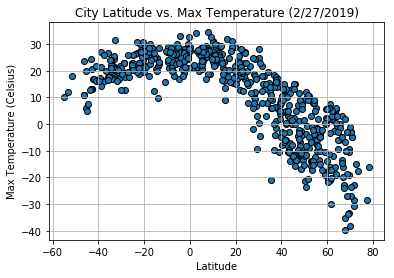

In [23]:
plt.scatter(
    df["Lat"],
    df["Max Temp"],
    edgecolors="k"
)

plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title(f"City Latitude vs. Max Temperature ({month}/{day}/{year})")

import os
plt.savefig(os.getcwd() + "/images/lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

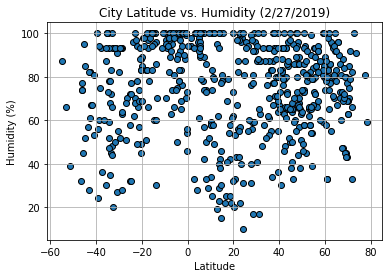

In [25]:
plt.scatter(
    df["Lat"],
    df["Humidity"],
    edgecolors="k"
)

plt.ylim((5, 105))
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({month}/{day}/{year})")

plt.savefig(os.getcwd() + "/images/lat_vs_humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

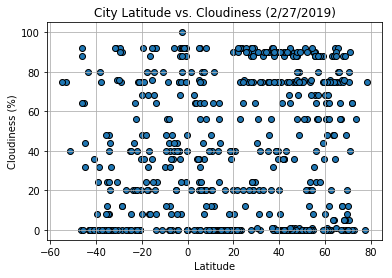

In [27]:
plt.scatter(
    df["Lat"],
    df["Cloudiness"],
    edgecolors="k"
)

plt.ylim((-5, 105))
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({month}/{day}/{year})")

plt.savefig(os.getcwd() + "/images/lat_vs_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

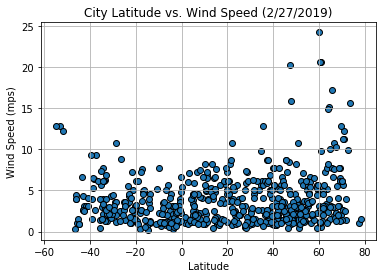

In [28]:
plt.scatter(
    df["Lat"],
    df["Wind Speed"],
    edgecolors="k"
)

plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.title(f"City Latitude vs. Wind Speed ({month}/{day}/{year})")

plt.savefig(os.getcwd() + "/images/lat_vs_windspeed.png")
plt.show()

### Three Observable Trends:
1. The more closer to the equator, the higher the maximum temperature.
2. The average humidity is higher for the cities with positve latitudes than the cities with negative latitudes.
3. Higher percent cloudiness (over 80%) usually happens in the cities with positive latitudes rather than the cities with negative latitudes.